In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import cv2
import random
# %matplotlib inline
%matplotlib qt
# np.set_printoptions(threshold=np.inf)

In [2]:
I = cv2.imread('bote.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

In [3]:
s=I.shape
print(s)
n=2000
coor=np.zeros([2,])
r=np.zeros([n,])
g=np.zeros([n,])
b=np.zeros([n,])
for i in range(n):
    x=random.randint(0, s[0]-1)
    y=random.randint(0, s[1]-1)
    r[i]=I[x,y,0]
    g[i]=I[x,y,1]
    b[i]=I[x,y,2]



(300, 400, 3)


In [4]:
nm=6
kmed=np.zeros([nm,3])
for i in range(nm):
    kmed[i,0]=random.randint(0, 255)
    kmed[i,1]=random.randint(0, 255)
    kmed[i,2]=random.randint(0, 255)
    
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(r, g, b)
ax.set_xlabel('R channel')
ax.set_ylabel('G channel')
ax.set_zlabel('B channel')   
ax.scatter(r, g, b)
for i in range(nm):
    ax.scatter(kmed[i,0], kmed[i,1], kmed[i,2], marker='^',s=60)

In [ ]:
dist=np.zeros([nm])
nf= s[0]
nc= s[1]
Is=np.zeros([nf,nc])

for ite in range(15): 
    medtemp=np.zeros([4,nm])
    for i in range(nf):    
        for j in range(nc): 
            temp2=I[i,j,:]
            for k in range(nm):
                temp=kmed[k,0]
                dist[k]=np.sqrt(np.sum((temp2-temp)**2))
            Is[i,j]=np.argmin(dist)   
            medtemp[0,Is[i,j].astype(int)]=medtemp[0,Is[i,j].astype(int)]+1
            medtemp[1,Is[i,j].astype(int)]=medtemp[1,Is[i,j].astype(int)]+temp2[0]
            medtemp[2,Is[i,j].astype(int)]=medtemp[2,Is[i,j].astype(int)]+temp2[1]
            medtemp[3,Is[i,j].astype(int)]=medtemp[3,Is[i,j].astype(int)]+temp2[2]

    for k in range(nm):
        kmed[[k][0]]=medtemp[1:4,k]/medtemp[0,k]  
    print(kmed)
    
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(r, g, b)
ax.set_xlabel('R channel')
ax.set_ylabel('G channel')
ax.set_zlabel('B channel')   
ax.scatter(r, g, b)
for i in range(nm):
    ax.scatter(kmed[i,0], kmed[i,1], kmed[i,2], marker='^',s=60)
    

In [47]:
plt.imshow(Is, cmap='jet')

In [48]:
roi=cv2.selectROI('sel',I)
cv2.destroyWindow('sel')
Iroi=I[int(roi[1]):int(roi[1]+roi[3]),int(roi[0]):int(roi[0]+roi[2]),:]
plt.imshow(Iroi, cmap='gray',vmin=0,vmax=255)

In [53]:
kmed = []
def on_mouse_click (event, x, y, flags, frame):
    if event == cv2.EVENT_LBUTTONUP:
        kmed.append(frame[y,x].tolist())
while True:
    cv2.imshow('frame', I)
    cv2.setMouseCallback('frame', on_mouse_click, I)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()
print (kmed)

[[110, 142, 167], [76, 118, 130], [135, 12, 14], [43, 34, 35], [194, 165, 131], [227, 219, 208], [116, 110, 110]]


In [54]:
nf,nc,nch=Iroi.shape
nmodels=len(kmed)
dist=np.zeros([nmodels])
Is=np.zeros([nf,nc])

for ite in range(20): 
    medtemp=np.zeros([4,nmodels])
    for i in range(nf):    
        for j in range(nc): 
            temp2=Iroi[i,j,:]
            for k in range(nmodels):
                temp=kmed[[k][0]]
                dist[k]=np.sqrt(np.sum((temp2-temp)**2))
            Is[i,j]=np.argmin(dist)
            medtemp[0,Is[i,j].astype(int)]=medtemp[0,Is[i,j].astype(int)]+1
            medtemp[1,Is[i,j].astype(int)]=medtemp[1,Is[i,j].astype(int)]+temp2[0]
            medtemp[2,Is[i,j].astype(int)]=medtemp[2,Is[i,j].astype(int)]+temp2[1]
            medtemp[3,Is[i,j].astype(int)]=medtemp[3,Is[i,j].astype(int)]+temp2[2]

    for k in range(nmodels):
        kmed[[k][0]]=medtemp[1:4,k]/medtemp[0,k]    
    
#     fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
#     ax[0, 0].imshow(Iroi, cmap='gray',vmin=0,vmax=255)
#     ax[0, 0].set_title('Original image')

#     ax[1, 0].imshow(Is==0, cmap='jet')
#     ax[1, 0].set_title('Segmentation')

#     ax[0, 1].imshow(Is==1, cmap='jet')
#     ax[0, 1].set_title('Segmentation')

#     ax[1, 1].imshow(Is==2, cmap='jet')
#     ax[1, 1].set_title('Segmentation')

In [55]:
plt.imshow(Is, cmap='jet')

Text(0.5, 1.0, 'Segmentation')

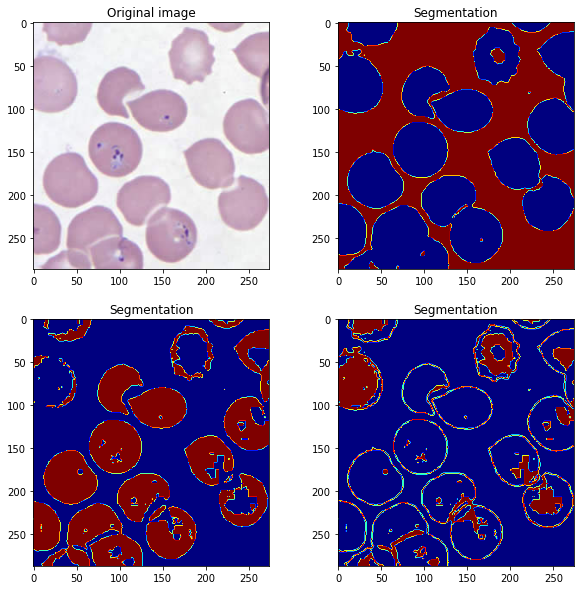

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].imshow(Iroi, cmap='gray',vmin=0,vmax=255)
ax[0, 0].set_title('Original image')

ax[1, 0].imshow(Is==0, cmap='jet')
ax[1, 0].set_title('Segmentation')

ax[0, 1].imshow(Is==1, cmap='jet')
ax[0, 1].set_title('Segmentation')

ax[1, 1].imshow(Is==2, cmap='jet')
ax[1, 1].set_title('Segmentation')